In [103]:
import pandas as pd
import numpy as np

In [104]:
data=pd.read_csv(r"E:\Users\Documents\College\Engineering\F.E. Eng\ACAIDS\Titanic.csv")

In [105]:
data.head(2)

,sex,age,fare,class,survived
0,male,22.0,7.2500,Third,0
1,female,38.0,71.2833,First,1


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       713 non-null    float64
 2   fare      886 non-null    float64
 3   class     888 non-null    object 
 4   survived  891 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 34.9+ KB


In [107]:
mean_age=data.age.mean()
mean_fare=data.fare.mean()

In [108]:
data.age.fillna(mean_age, inplace=True)
data.fare.fillna(mean_fare, inplace=True)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       891 non-null    float64
 2   fare      891 non-null    float64
 3   class     888 non-null    object 
 4   survived  891 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 34.9+ KB


In [110]:
newdata=pd.get_dummies(data)
newdata

,age,fare,survived,sex_female,sex_male,class_First,class_Second,class_Third
0,22.000000,7.2500,0,False,True,False,False,True
1,38.000000,71.2833,1,True,False,True,False,False
2,26.000000,7.9250,1,True,False,False,False,True
3,35.000000,53.1000,1,True,False,True,False,False
4,35.000000,8.0500,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,False,True,False,True,False
887,19.000000,30.0000,1,True,False,True,False,False
888,29.719734,23.4500,0,True,False,False,False,True
889,26.000000,30.0000,1,False,True,True,False,False


In [111]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           891 non-null    float64
 1   fare          891 non-null    float64
 2   survived      891 non-null    int64  
 3   sex_female    891 non-null    bool   
 4   sex_male      891 non-null    bool   
 5   class_First   891 non-null    bool   
 6   class_Second  891 non-null    bool   
 7   class_Third   891 non-null    bool   
dtypes: bool(5), float64(2), int64(1)
memory usage: 25.4 KB


In [112]:
x=newdata.drop("survived", axis="columns")
print(x)
y=newdata.survived
print(y)

           age     fare  sex_female  sex_male  class_First  class_Second  \
0    22.000000   7.2500       False      True        False         False   
1    38.000000  71.2833        True     False         True         False   
2    26.000000   7.9250        True     False        False         False   
3    35.000000  53.1000        True     False         True         False   
4    35.000000   8.0500       False      True        False         False   
..         ...      ...         ...       ...          ...           ...   
886  27.000000  13.0000       False      True        False          True   
887  19.000000  30.0000        True     False         True         False   
888  29.719734  23.4500        True     False        False         False   
889  26.000000  30.0000       False      True         True         False   
890  32.000000   7.7500       False      True        False         False   

     class_Third  
0           True  
1          False  
2           True  
3          

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=1)

In [114]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [115]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [116]:
y_predict_test=logreg.predict(x_test)
y_predict_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix=pd.DataFrame(confusion_matrix(y_test,y_predict_test))
confusion_matrix.index=["actual died", "actual survived"]
confusion_matrix.columns=["predicted died", "predicted survived"]
confusion_matrix

,predicted died,predicted survived
actual died,229,34
actual survived,66,117


In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_test)

0.7757847533632287

<Axes: xlabel='survived'>

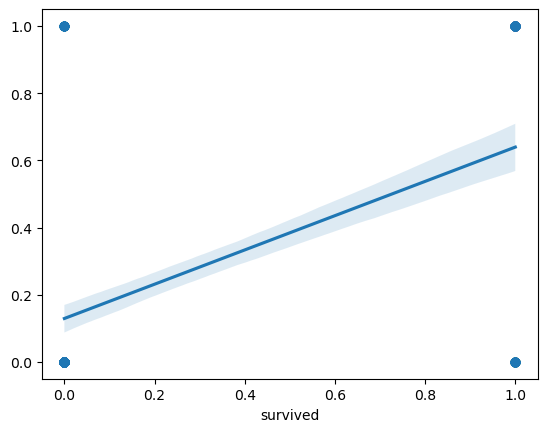

In [121]:
import seaborn as sns
sns.regplot(x=y_test,y=y_predict_test)